# Exploratory Data Analysis (EDA)

**Tujuan:** Menganalisis dataset MARS untuk memahami perilaku pengguna dan karakteristik konten. Setiap temuan dari EDA ini akan menjadi dasar hipotesis untuk **Langkah 1: Feature Engineering**.

**Checklist EDA:**
1.  **Pengecekan Dasar:** Memuat data, memeriksa tipe data, dan statistik unik.
2.  **Analisis Missing Values:** Mengidentifikasi kualitas data dan memutuskan kolom mana yang akan digunakan atau dibuang.
3.  **Analisis Distribusi:** Mencari pola inti dalam perilaku pengguna dan karakteristik konten.

## 1. Setup & Pengecekan Dasar

Pertama, kita impor *library*. Berdasarkan struktur file baru (`_en` dan `_fr`), kita akan memuat 8 file CSV dan **menggabungkannya (concatenate)** menjadi 4 DataFrame utama: `df_users`, `df_items`, `df_explicit`, dan `df_implicit`. Ini memberi kita gambaran utuh dari *seluruh* populasi siswa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Mengatur style visualisasi
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Tentukan path ke folder data.
# Karena notebook ini ada di 'notebooks/', path ke data adalah '../data/'
DATA_DIR = '../data/'

# Cek apakah path valid
if not os.path.exists(DATA_DIR):
    print(f"Error: Directory not found at {DATA_DIR}.")
    print("Pastikan folder 'data/' ada di level root proyek Anda (satu level di atas 'notebooks/').")
else:
    print(f"Data directory found at: {DATA_DIR}")

try:
    # 1. Muat & Gabungkan Users
    df_users_en = pd.read_csv(os.path.join(DATA_DIR, 'users_en.csv'))
    df_users_fr = pd.read_csv(os.path.join(DATA_DIR, 'users_fr.csv'))
    df_users = pd.concat([df_users_en, df_users_fr], ignore_index=True)

    # 2. Muat & Gabungkan Items
    df_items_en = pd.read_csv(os.path.join(DATA_DIR, 'items_en.csv'))
    df_items_fr = pd.read_csv(os.path.join(DATA_DIR, 'items_fr.csv'))
    df_items = pd.concat([df_items_en, df_items_fr], ignore_index=True)

    # 3. Muat & Gabungkan Explicit Ratings
    df_explicit_en = pd.read_csv(os.path.join(DATA_DIR, 'explicit_ratings_en.csv'))
    df_explicit_fr = pd.read_csv(os.path.join(DATA_DIR, 'explicit_ratings_fr.csv'))
    df_explicit = pd.concat([df_explicit_en, df_explicit_fr], ignore_index=True)

    # 4. Muat & Gabungkan Implicit Ratings
    df_implicit_en = pd.read_csv(os.path.join(DATA_DIR, 'implicit_ratings_en.csv'))
    df_implicit_fr = pd.read_csv(os.path.join(DATA_DIR, 'implicit_ratings_fr.csv'))
    df_implicit = pd.concat([df_implicit_en, df_implicit_fr], ignore_index=True)

    print("\nData loaded and concatenated successfully:")
    print(f"Total Users: {df_users.shape}")
    print(f"Total Items: {df_items.shape}")
    print(f"Total Explicit Ratings: {df_explicit.shape}")
    print(f"Total Implicit Ratings: {df_implicit.shape}")

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Pastikan semua 8 file CSV (users_en.csv, users_fr.csv, dll.) ada di dalam folder '../data/'.")

Data directory found at: ../data/

Data loaded and concatenated successfully:
Total Users: (131247, 2)
Total Items: (2618, 12)
Total Explicit Ratings: (88998, 5)
Total Implicit Ratings: (275735, 3)


In [3]:
print("--- Users Info ---")
df_users.info()
print("\n--- Items Info ---")
df_items.info()
print("\n--- Explicit Ratings Info ---")
df_explicit.info()
print("\n--- Implicit Ratings Info ---")
df_implicit.info()

--- Users Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131247 entries, 0 to 131246
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  131247 non-null  int64 
 1   job      10466 non-null   object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB

--- Items Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      2618 non-null   int64  
 1   language     2618 non-null   object 
 2   name         2618 non-null   object 
 3   nb_views     2511 non-null   float64
 4   description  2230 non-null   object 
 5   created_at   2618 non-null   int64  
 6   Difficulty   824 non-null    object 
 7   Job          2618 non-null   object 
 8   Software     2618 non-null   object 
 9   Theme        2618 non-null   object 
 10  duration     2618 non-null   floa

In [4]:
print("--- Data Unik ---")
print(f"Total Unique Users (dari users.csv): {df_users['user_id'].nunique()}")
print(f"Total Unique Items (dari items.csv): {df_items['item_id'].nunique()}")

print(f"\nUsers in Explicit Ratings: {df_explicit['user_id'].nunique()}")
print(f"Items in Explicit Ratings: {df_explicit['item_id'].nunique()}")

print(f"Users in Implicit Ratings: {df_implicit['user_id'].nunique()}")
print(f"Items in Implicit Ratings: {df_implicit['item_id'].nunique()}")

--- Data Unik ---
Total Unique Users (dari users.csv): 131247
Total Unique Items (dari items.csv): 2618

Users in Explicit Ratings: 10611
Items in Explicit Ratings: 2126
Users in Implicit Ratings: 21526
Items in Implicit Ratings: 2334


**Temuan Awal (Pengecekan Dasar):**
* **Tipe Data:** Sebagian besar tipe data sudah benar (Angka sebagai `int` atau `float`, Kategori sebagai `object`). Kolom `Creation Date` perlu diubah ke `datetime` jika kita ingin melakukan analisis berbasis waktu, tapi untuk clustering awal, ini belum tentu perlu.
* **Skala:** Kita berhadapan dengan ~131k users dan ~2.6k items (total FR + EN, sesuai paper). Namun, hanya sebagian kecil dari user yang aktif (Total user unik di `explicit` + `implicit` jauh lebih kecil dari total di `users.csv`). Ini adalah pola *long-tail* yang khas di platform online.

## 2. Analisis Missing Values (Kualitas Data)

Sekarang, kita fokus pada *kualitas* data. Kolom apa yang bisa kita andalkan? Kita akan visualisasikan persentase data yang hilang. Ini akan menentukan fitur mana yang layak dibuat.

In [5]:
def missing_data_analysis(df, df_name):
    missing_pct = (df.isnull().sum() / len(df)) * 100
    missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
    print(f"\n--- Missing Data in {df_name} ---")
    if missing_pct.empty:
        print("No missing data found.")
    else:
        print(missing_pct)
        
    return missing_pct

missing_users = missing_data_analysis(df_users, "Users")
missing_items = missing_data_analysis(df_items, "Items")
missing_explicit = missing_data_analysis(df_explicit, "Explicit Ratings")
missing_implicit = missing_data_analysis(df_implicit, "Implicit Ratings")


--- Missing Data in Users ---
job    92.025722
dtype: float64

--- Missing Data in Items ---
Difficulty     68.525592
description    14.820474
nb_views        4.087089
dtype: float64

--- Missing Data in Explicit Ratings ---
No missing data found.

--- Missing Data in Implicit Ratings ---
No missing data found.


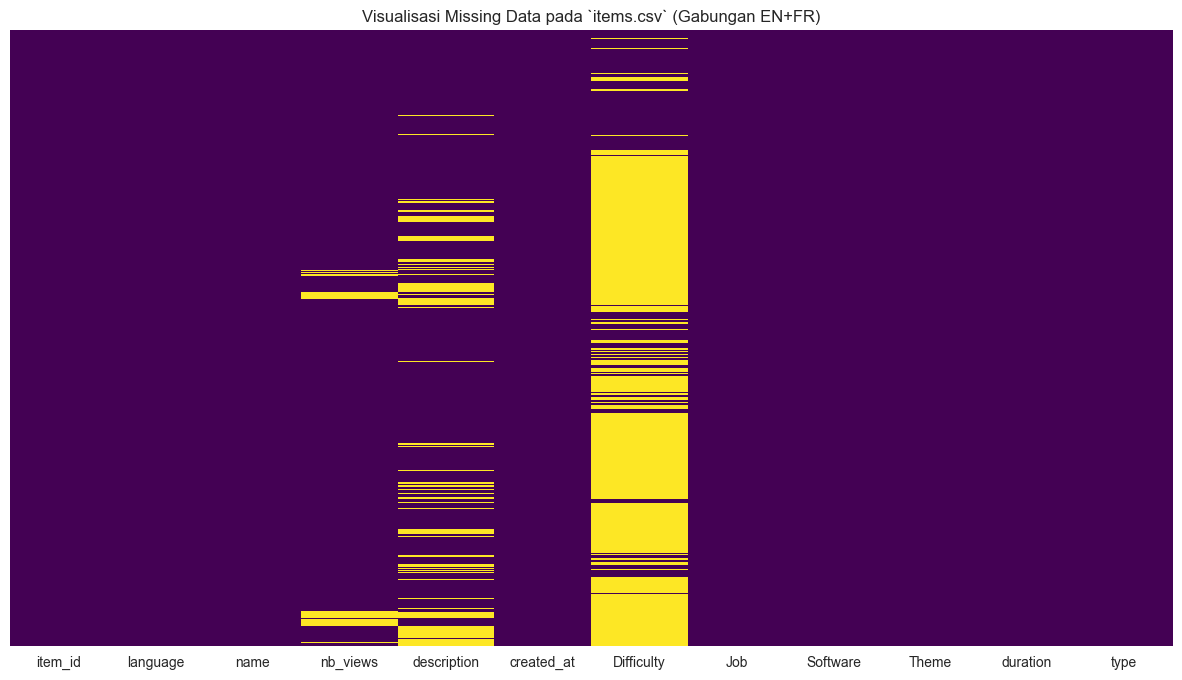

In [6]:
# Visualisasikan data yang hilang di df_items, karena ini krusial untuk fitur konten
plt.figure(figsize=(15, 8))
sns.heatmap(df_items.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Visualisasi Missing Data pada `items.csv` (Gabungan EN+FR)')
plt.show()

**Temuan & Tindakan (Missing Values):**

* `users.csv`: Kolom `job` (pekerjaan) hilang **92%**. **Tindakan FE:** Kolom ini **dibuang**. Tidak ada nilai informatif yang bisa diambil.
* `items.csv`: Kolom `Difficulty` hilang **68.5%**. **Tindakan FE:** Kolom ini juga akan **dibuang**. Terlalu banyak data hilang untuk di-imputasi secara akurat.
* `items.csv` (Kabar Baik): Kolom `Type`, `Software`, dan `Theme` **tidak muncul** dalam daftar *missing values*, yang berarti data tersebut 100% lengkap. **Tindakan FE:** Ini akan menjadi **fitur konten utama** kita.
* `ratings` (explicit/implicit): Tidak ada data `User ID` atau `Item ID` yang hilang. Ini sangat bagus dan menunjukkan data transaksional yang bersih.

### 3.1. Perilaku Tontonan (dari `explicit_ratings`)

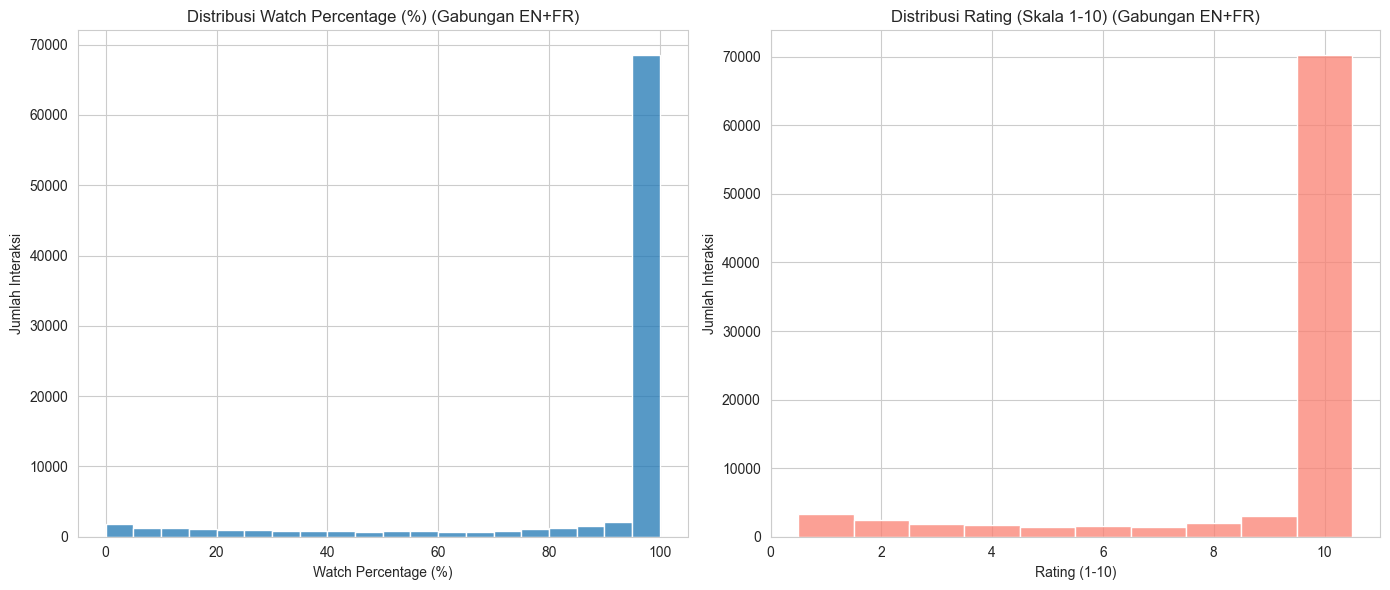

In [8]:
plt.figure(figsize=(14, 6))

# Plot 1: Distribusi 'watch_percentage'
plt.subplot(1, 2, 1)
sns.histplot(df_explicit['watch_percentage'], bins=20, kde=False)
plt.title('Distribusi Watch Percentage (%) (Gabungan EN+FR)')
plt.xlabel('Watch Percentage (%)')
plt.ylabel('Jumlah Interaksi')

# Plot 2: Distribusi 'rating'
plt.subplot(1, 2, 2)
sns.histplot(df_explicit['rating'], bins=10, discrete=True, color='salmon')
plt.title('Distribusi Rating (Skala 1-10) (Gabungan EN+FR)')
plt.xlabel('Rating (1-10)')
plt.ylabel('Jumlah Interaksi')

plt.tight_layout()
plt.show()

**Temuan & Hipotesis FE (Perilaku Tontonan):**

* **Koreksi Pola Distribusi:** Pengamatan dari plot sangat jelas. Polanya **bukan Bimodal** klasik (dua puncak setara). Sebaliknya, ini adalah **distribusi J-shaped (asimetris)** dengan **satu puncak yang masif dan dominan di `rating = 10`**.

* **Catatan (EN+FR) vs. Paper (Hanya EN):** Perbedaan dari paper ini sangat mungkin terjadi. **Fig. 1 & 2 di paper *hanya* menganalisis dataset Bahasa Inggris (EN)**. Plot kita, yang **menggabungkan data EN dan Prancis (FR)**, menunjukkan bahwa populasi Prancis (FR) kemungkinan memiliki tingkat penyelesaian (`completion_rate`) yang jauh lebih tinggi. Ini menyebabkan puncak `rating = 10` menjadi sangat dominan dan 'menenggelamkan' puncak `rating = 1` yang mungkin lebih terlihat di data EN saja.

* **Puncak Sekunder & Kurva Cekung:** Meskipun puncaknya tidak setara, kita masih melihat pola yang sama: ada **puncak sekunder** (titik tertinggi kedua) di `rating = 1` (langsung *drop-off*). Nilai `rating` dari 1 hingga 9 kemudian membentuk **kurva cekung**, di mana `rating` tengah (5, 6, 7) adalah perilaku yang paling *jarang* terjadi. 

* **Artinya:** Perilaku pengguna (gabungan) sangat terpolarisasi. Perilaku yang paling umum adalah **menyelesaikan video** (skor 10). Perilaku umum kedua adalah **langsung meninggalkannya** (skor 1). Pengguna sangat jarang berhenti di tengah-tengah video.

* **Hipotesis FE (Semakin Penting):** Pengamatan ini **MEMPERKUAT** hipotesis awal kita. Menggunakan `avg_rating` (rata-rata) akan **sangat menyesatkan**. Seorang user dengan rating `[10, 10, 1, 1]` (rata-rata 5.5) sangat berbeda dari user `[5, 6, 5, 6]` (rata-rata 5.5). Oleh karena itu, kita *harus* mengukur kedua ujung ekstrem ini secara terpisah.

    * **Fitur yang akan kita buat (Tetap Valid & Dikonfirmasi):**
        1.  `completion_rate` (Persentase tontonan dengan `rating` 9-10) -> *Mengukur puncak masif di 10.*
        2.  `drop_off_rate` (Persentase tontonan dengan `rating` 1-2) -> *Mengukur puncak sekunder di 1.*
        3.  `total_interactions` (Total video yang ditonton)

### 3.2. Karakteristik Konten (dari `items.csv`)

Kita akan membuang kolom `Difficulty` yang banyak hilang, dan fokus pada `type`, `Software`, dan `Theme` yang datanya lengkap.

In [9]:
df_items['Theme'].value_counts().head()

Theme
[]                 479
['Produire']       304
['Produce']        204
['Découvrir']       99
["S'organiser"]     91
Name: count, dtype: int64

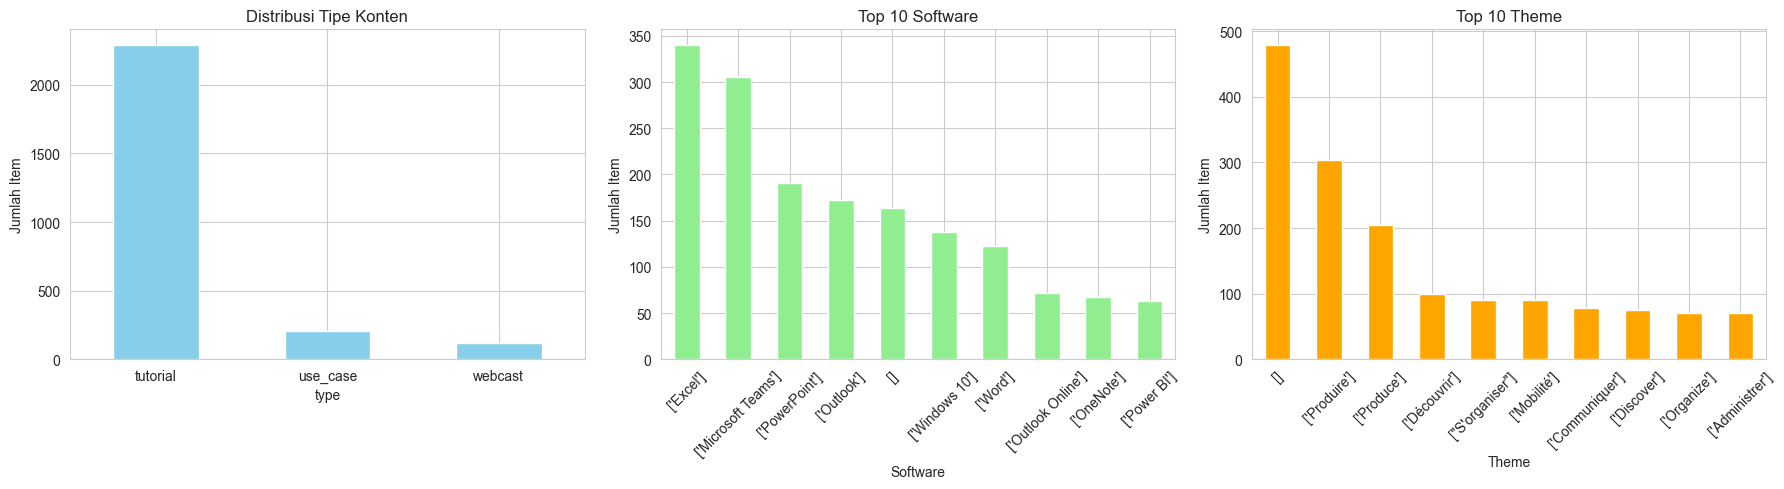

In [16]:
# Mengisi NaN dengan 'Unknown' agar bisa di-plot (Praktik aman, meskipun data kita bersih)
df_items['type'] = df_items['type'].fillna('Unknown')
df_items['Software'] = df_items['Software'].fillna('Unknown')
df_items['Theme'] = df_items['Theme'].fillna('Unknown')

plt.figure(figsize=(18, 5))

# Plot 1: Tipe Konten
plt.subplot(1, 3, 1)
df_items['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Tipe Konten')
plt.ylabel('Jumlah Item')
plt.xticks(rotation=0)

# Plot 2: Top 10 Software
plt.subplot(1, 3, 2)
df_items['Software'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Software')
plt.ylabel('Jumlah Item')
plt.xticks(rotation=45)

# Plot 3: Top 10 Theme
plt.subplot(1, 3, 3)
df_items['Theme'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Theme')
plt.ylabel('Jumlah Item')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Temuan & Hipotesis FE (Karakteristik Konten):**

* **Tipe Konten:** Mayoritas konten adalah `Tutorial` singkat. `Webcast` (durasi panjang) adalah minoritas. Ini menunjukkan platform ini lebih fokus pada pembelajaran *micro-learning*.
* **Topik:** Topik seputar `Office 365` (`Excel`, `Teams`, `SharePoint`) sangat mendominasi.
* **Hipotesis FE:** Kita bisa mengelompokkan siswa berdasarkan preferensi mereka terhadap:
    1.  **Format Belajar:** Apakah mereka lebih suka `Tutorial` singkat atau `Webcast` panjang? (Kita akan buat fitur `pref_type_tutorial_pct` vs `pref_type_webcast_pct`).
    2.  **Spesialisasi Topik:** Apakah mereka 'Generalis' (menyentuh banyak software) atau 'Spesialis' (fokus hanya pada 1-2 software, misal `Excel`)? (Kita akan buat fitur `pref_software_excel_pct`, `pref_software_teams_pct`, dll.)

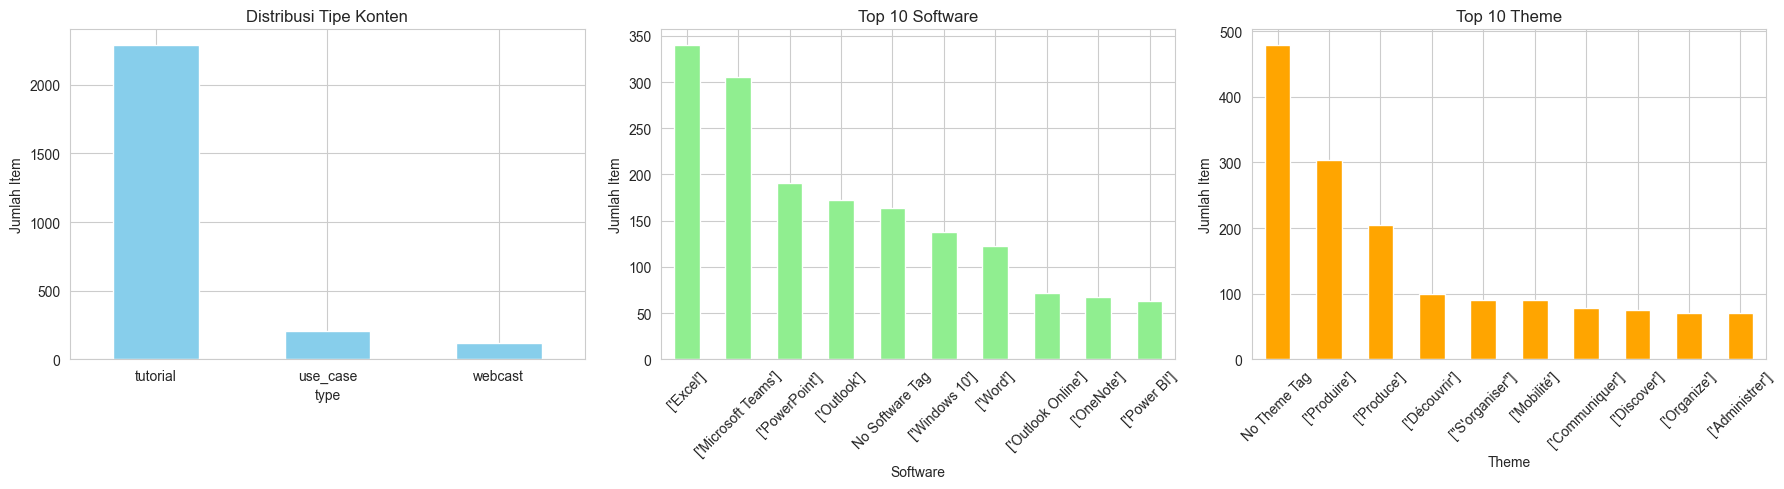

In [ ]:
# --- ]BERDASARKAN TEMUAN EDA ---
# Mengganti string '[]' (daftar kosong) dengan label yang lebih deskriptif.
# Ini string literal yang berarti "tidak ada tag".
df_items['Software'] = df_items['Software'].replace('[]', 'No Software Tag')
df_items['Theme'] = df_items['Theme'].replace('[]', 'No Theme Tag')

plt.figure(figsize=(18, 5))

# Plot 1: Tipe Konten
plt.subplot(1, 3, 1)
df_items['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Tipe Konten')
plt.ylabel('Jumlah Item')
plt.xticks(rotation=0)

# Plot 2: Top 10 Software (Sekarang sudah bersih)
plt.subplot(1, 3, 2)
df_items['Software'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Software')
plt.ylabel('Jumlah Item')
plt.xticks(rotation=45)

# Plot 3: Top 10 Theme (Sekarang sudah bersih)
plt.subplot(1, 3, 3)
df_items['Theme'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Theme')
plt.ylabel('Jumlah Item')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Temuan & Hipotesis FE (Karakteristik Konten):**

* **Tipe Konten:** Mayoritas konten adalah `Tutorial` singkat. `Webcast` (durasi panjang) adalah minoritas. Ini menunjukkan platform ini lebih fokus pada pembelajaran *micro-learning*.

* **Topik (DENGAN KOREKSI):** Plot baru menunjukkan bahwa `No Theme Tag` adalah 'tema' yang paling umum (479 item) dan `No Software Tag` adalah salah satu 'software' teratas (164 item). Ini adalah **noise** dalam data kita jika tujuan kita adalah memahami *preferensi topik*.

* **Hipotesis FE:** Kita bisa mengelompokkan siswa berdasarkan preferensi mereka terhadap:
    1.  **Format Belajar:** Apakah mereka lebih suka `Tutorial` singkat atau `Webcast` panjang? (Fitur `pref_type_tutorial_pct` vs `pref_type_webcast_pct` **masih valid**).
    2.  **Spesialisasi Topik:** Apakah mereka 'Generalis' atau 'Spesialis'?
    3.  **TINDAKAN FE BARU:** Saat membuat fitur preferensi topik (misal `pref_software_excel_pct`), kita harus **mengabaikan interaksi** di mana item yang ditonton memiliki `Software == 'No Software Tag'`. Interaksi ini tidak memberi tahu kita apa-apa tentang *topik* yang disukai siswa, hanya saja mereka menonton sesuatu.

### 3.3. Aktivitas User

Terakhir, apakah semua user layak kita masukkan ke model clustering? User yang hanya menonton 1 video tidak memiliki "gaya belajar" yang bisa dianalisis. Kita perlu memfilter mereka.

--- Statistik Aktivitas User (Describe) ---
count    10611.000000
mean         8.387334
std         27.795595
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        880.000000
Name: total_interactions, dtype: float64


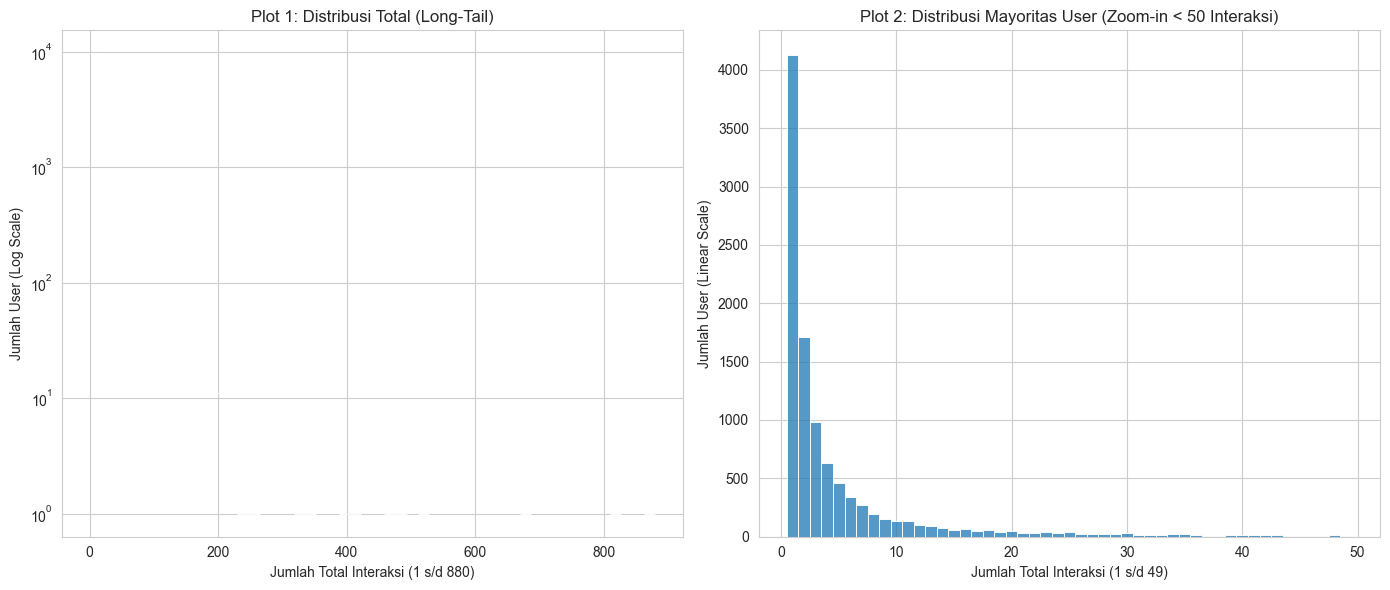

In [11]:
# Kita fokus pada explicit ratings, karena ini menunjukkan niat belajar yang lebih kuat
user_activity = df_explicit.groupby('user_id').size().to_frame('total_interactions')

print("--- Statistik Aktivitas User (Describe) ---")
print(user_activity['total_interactions'].describe())

# --- Plot 1: Distribusi Keseluruhan (Log-Y) ---
# Ini menunjukkan 'long tail' dengan max=880, seperti yang Anda lihat (gepeng di kiri)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(user_activity['total_interactions'], bins=50, log_scale=(False, True))
plt.title('Plot 1: Distribusi Total (Long-Tail)')
plt.xlabel('Jumlah Total Interaksi (1 s/d 880)')
plt.ylabel('Jumlah User (Log Scale)')

# --- Plot 2: Zoom-in pada "Head" & "Body" ---
# Kita plot hanya user dengan < 50 interaksi (ini akan membuang outlier ekstrem)
# Ini akan jauh lebih jelas dan menunjukkan distribusi mayoritas user
zoomed_activity = user_activity[user_activity['total_interactions'] < 50]
plt.subplot(1, 2, 2)
sns.histplot(zoomed_activity['total_interactions'], bins=49, discrete=True) # bins=49 agar tiap angka punya batang sendiri
plt.title('Plot 2: Distribusi Mayoritas User (Zoom-in < 50 Interaksi)')
plt.xlabel('Jumlah Total Interaksi (1 s/d 49)')
plt.ylabel('Jumlah User (Linear Scale)')

plt.tight_layout()
plt.show()

In [12]:
# Analisis numerik dari aktivitas user untuk mengukur distribusi long-tail
print("Persentase User dengan Interaksi Minimal:")
total_users = len(user_activity)
for n in [1, 2, 3, 5, 10]:
    pct = (len(user_activity[user_activity['total_interactions'] <= n]) / total_users) * 100
    print(f"Users dengan <= {n} interaksi: {pct:.2f}%")

Persentase User dengan Interaksi Minimal:
Users dengan <= 1 interaksi: 38.93%
Users dengan <= 2 interaksi: 55.09%
Users dengan <= 3 interaksi: 64.35%
Users dengan <= 5 interaksi: 74.63%
Users dengan <= 10 interaksi: 85.02%


**Temuan Kunci: Distribusi Long-Tail yang Ekstrem**

Hasil analisis numerik (di atas) dan visual (dari plot `describe()` dan `histplot`) menunjukkan distribusi *long-tail* yang sangat miring.

**Insight Kritis:**
* **Median (50%)** dari user (lebih dari **55%**) hanya memiliki **2 interaksi atau kurang**.
* **Hampir 75%** dari seluruh user (`74.63%`) memiliki **5 interaksi atau kurang**.
* Mayoritas absolut dari basis pengguna adalah 'turis' atau *one-time user* yang hanya mencoba 1-2 video dan tidak pernah kembali.   

**Hipotesis & Tindakan FE (Pembersihan Data):**
* Mustahil untuk menentukan 'gaya belajar' dari user yang hanya memiliki 1 atau 2 data poin. Sinyal yang diberikan terlalu lemah dan penuh *noise*.
* **Tindakan:** Untuk membangun cluster yang stabil dan bermakna, kita **harus** memfilter populasi. Kita akan menetapkan ambang batas **minimal 5 interaksi `explicit_ratings`**.
* **Konsekuensi:** Ini adalah *trade-off* yang disengaja. Kita akan membuang ~75% user 'turis' untuk fokus menganalisis ~25% user yang *sebenarnya* aktif dan memiliki data yang cukup untuk di-cluster.

## 4. Kesimpulan EDA & Rencana Taktis Feature Engineering

EDA telah selesai. Temuan-temuan di atas menghasilkan serangkaian hipotesis dan tindakan yang jelas untuk **Langkah 1: Feature Engineering**. 

Tujuannya adalah untuk mengubah data mentah dari berbagai tabel menjadi **satu tabel fitur utama** di mana setiap baris adalah satu `user_id` yang *memenuhi syarat*.

**Rangkuman Rencana Taktis (FE):**

1.  **Filter Populasi User (Sangat Penting):**
    * Hanya proses `user_id` yang memiliki **minimal 5 `explicit_ratings`**. (Berdasarkan temuan 3.3, ini akan memfilter ~75% user 'turis').

2.  **Filter Fitur (Pembersihan Kolom):**
    * **Buang** kolom `job` (dari `users.csv`) -> >90% hilang.
    * **Buang** kolom `Difficulty` (dari `items.csv`) -> >68% hilang.
    * **Bersihkan** data kategorikal: Ganti string literal `[]` di `Software` dan `Theme` dengan label 'No Tag' untuk memisahkan 'tidak ada data' dari data yang valid.

3.  **Grup Fitur 1: Engagement (Perilaku Tontonan):**
    * `total_explicit_interactions` (Jumlah total video ditonton)
    * `total_implicit_interactions` (Jumlah total halaman dikunjungi)
    * `completion_rate` (Persentase `rating` 9-10) -> *Mengukur puncak masif di 10.*
    * `drop_off_rate` (Persentase `rating` 1-2) -> *Mengukur puncak sekunder di 1.*
    * `avg_watch_pct` (Rata-rata `watch_percentage`)

4.  **Grup Fitur 2: Preferensi Format (Tipe Konten):**
    * `pref_type_tutorial_pct` (Persentase video 'Tutorial' yang ditonton, dari kolom `type`)
    * `pref_type_webcast_pct` (Persentase video 'Webcast' yang ditonton, dari kolom `type`)
    * `avg_duration_watched` (Rata-rata `duration` video yang ditonton)

5.  **Grup Fitur 3: Preferensi Topik (Spesialisasi):**
    * `topic_specialization` (Jumlah `Software` unik yang ditonton. Mengabaikan 'No Tag').
    * `pref_software_excel_pct` (Persentase tontonan pada `['Excel']`)
    * `pref_software_teams_pct` (Persentase tontonan pada `['Microsoft Teams']`)
    * (Dan beberapa software top lainnya).

---
**EDA Selesai. Kita siap untuk Langkah 1: Feature Engineering.**